In [346]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [347]:
df=pd.read_csv('water_potability.csv')
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [348]:
df.shape

(3276, 10)

In [349]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [350]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [351]:
missing_values_count = df.isnull().sum(axis=1)
rows_with_2_missing = (missing_values_count == 2).sum()
rows_with_1_missing = (missing_values_count == 1).sum()
rows_with_more_than_2_missing = (missing_values_count > 2).sum()
rows_with_more_than_3_missing = (missing_values_count > 3).sum()
print(f"Number of rows with 1 missing values: {rows_with_1_missing}")
print(f"Number of rows with 2 missing values: {rows_with_2_missing}")
print(f"Number of rows with more than 2 missing values: {rows_with_more_than_2_missing}")
print(f"Number of rows with more than 3 missing values: {rows_with_more_than_3_missing}")


Number of rows with 1 missing values: 1105
Number of rows with 2 missing values: 151
Number of rows with more than 2 missing values: 9
Number of rows with more than 3 missing values: 0


In [352]:
missing_values_count = df.isnull().sum()
print(missing_values_count)

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [353]:
median_values_by_portability = df.groupby('Potability').median()
def fill_missing_with_random_variation(row, column):
    if pd.isnull(row[column]):
        potability = row['Potability']
        median_value = median_values_by_portability.loc[potability, column]
        random_variation = random.uniform(-0.0001, 0.0001)
        return float(median_value + random_variation)
    else:
        return row[column]
columns_to_fill = ['ph', 'Sulfate', 'Trihalomethanes']
for column in columns_to_fill:
    df[column] = df.apply(fill_missing_with_random_variation, args=(column,), axis=1)

df


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.035375,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.389419,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.389523,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,331.838109,392.449580,19.903225,66.678161,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,331.838169,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,331.838078,402.883113,11.168946,77.488213,4.708658,1


C:\Users\idhan\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='ph'>

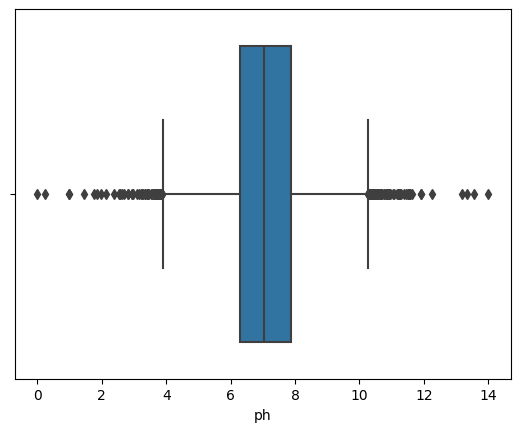

In [354]:
sns.boxplot(x='ph',data=df)

In [355]:
df=df[(df['ph']>=2) & (df['ph']<12.5)]
df.shape

(3264, 10)

C:\Users\idhan\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Hardness'>

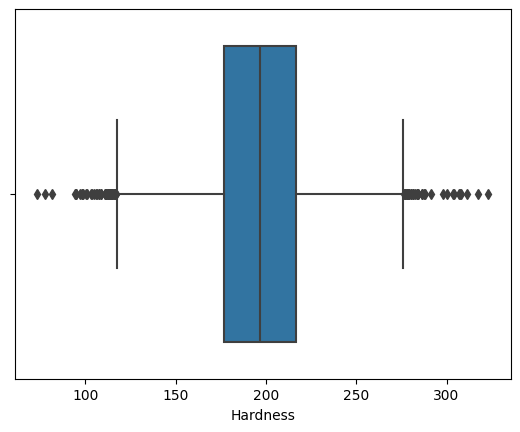

In [356]:
sns.boxplot(x='Hardness',data=df)

In [357]:
df=df[(df['Hardness']>=80)]
df.shape

(3262, 10)

C:\Users\idhan\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Solids'>

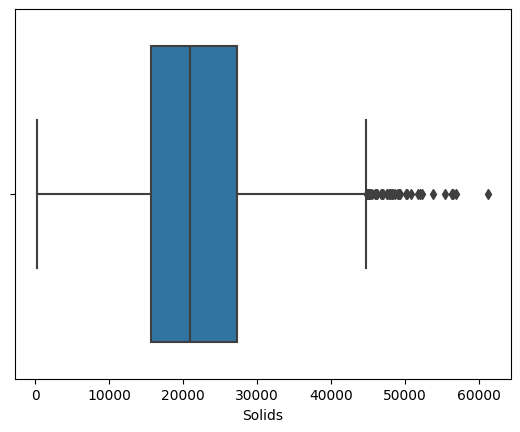

In [358]:
sns.boxplot(x='Solids',data=df)

In [359]:
df=df[(df['ph']<=60000)]
df.shape

(3262, 10)

C:\Users\idhan\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Chloramines'>

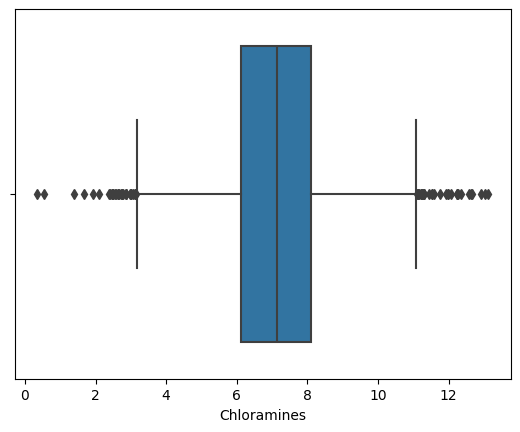

In [360]:
sns.boxplot(x='Chloramines',data=df)

In [361]:
df=df[(df['Chloramines']>=2)]
df.shape

(3257, 10)

C:\Users\idhan\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Sulfate'>

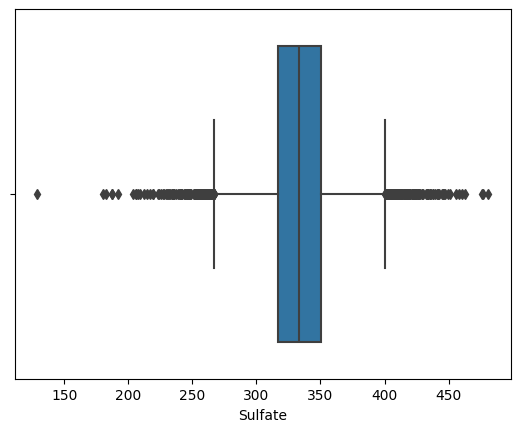

In [362]:
sns.boxplot(x='Sulfate',data=df)

In [363]:
df=df[(df['Sulfate']>=150)&(df['Sulfate']<=475)]
df.shape

(3253, 10)

C:\Users\idhan\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Conductivity'>

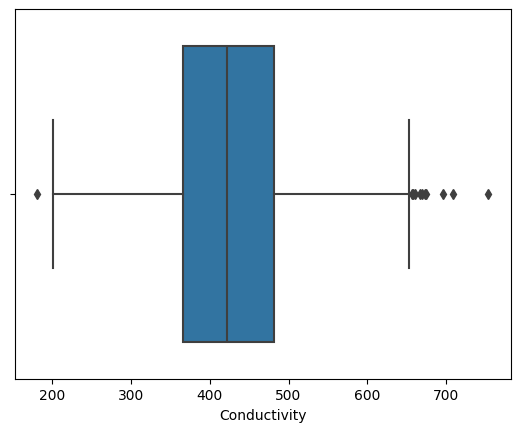

In [364]:
sns.boxplot(x='Conductivity',data=df)

In [365]:
df=df[(df['Conductivity']<=750)]
df.shape

(3252, 10)

C:\Users\idhan\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Organic_carbon'>

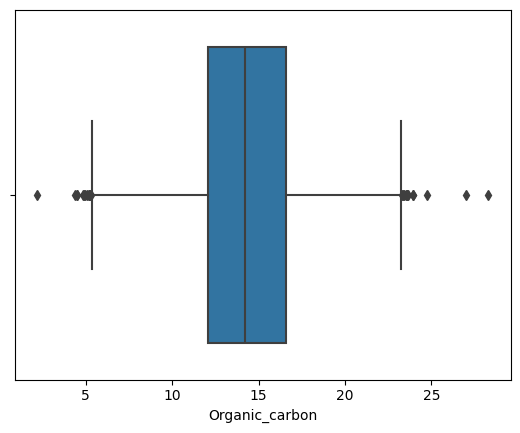

In [366]:
sns.boxplot(x='Organic_carbon',data=df)

In [367]:
df=df[(df['Organic_carbon']<27)]
df.shape

(3250, 10)

C:\Users\idhan\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Trihalomethanes'>

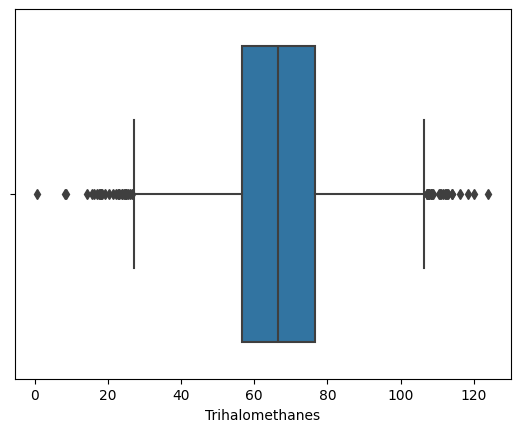

In [368]:
sns.boxplot(x='Trihalomethanes',data=df)

In [369]:
df=df[(df['Trihalomethanes'])>=15]
df.shape

(3246, 10)

C:\Users\idhan\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Turbidity'>

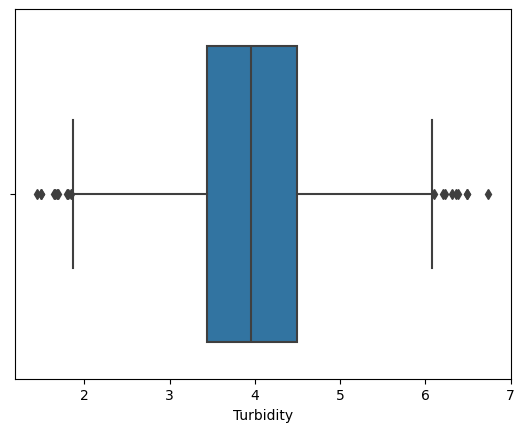

In [370]:
sns.boxplot(x='Turbidity',data=df)

<Axes: >

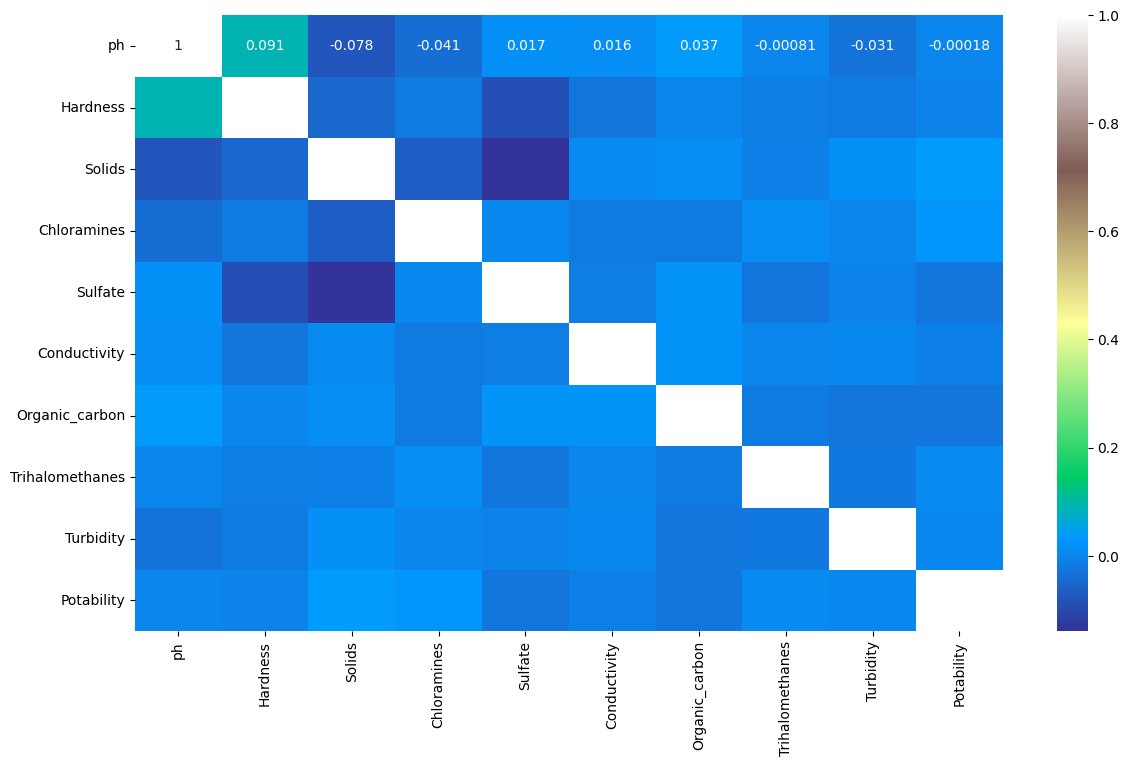

In [371]:
plt.figure(figsize=(14, 8))
sns.heatmap(df.corr(),cmap='terrain', annot=True)


In [372]:
# df=df[(df['ph']>=2.128531) & (df['ph']<=12.246928)]
# df=df[(df['Hardness']>=81.710895) & (df['Hardness']<=323.124000)]
# df=df[(df['Solids']>=320.942611) & (df['Solids']<=61227.196008	)]
# df=df[(df['Chloramines']>=2.102691) & (df['Chloramines']<=13.127000)]
# df=df[(df['Sulfate']>=180.206746) & (df['Sulfate']<=462.474215)]
# df=df[(df['Conductivity']>=181.483754) & (df['Conductivity']<=708.226364)]
# df=df[(df['Organic_carbon']>=2.200000) & (df['Organic_carbon']<=24.755392)]
# df=df[(df['Trihalomethanes']>=15.684877) & (df['Trihalomethanes']<=	124.000000)]
# df=df[(df['Turbidity']>=1.450000) & (df['Turbidity']<=6.739000)]
# df.shape

In [373]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

In [374]:
df['Potability'].value_counts()

Potability
0    1984
1    1262
Name: count, dtype: int64

We notice a class imbalance in here.

Potability 0: 1984
Potability 1: 1262


C:\Users\idhan\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\idhan\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\idhan\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


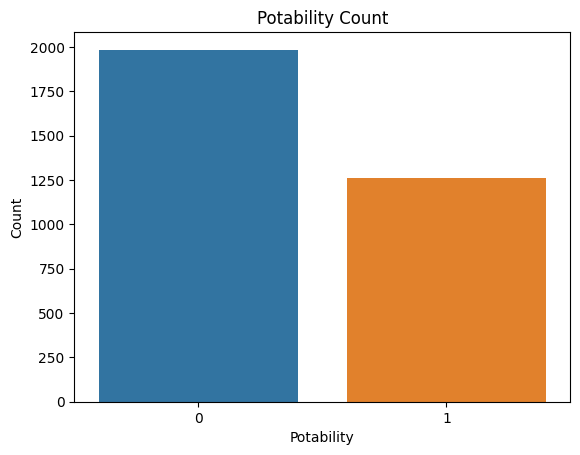

In [375]:
potability_counts = df['Potability'].value_counts()
print("Potability 0:", potability_counts[0])
print("Potability 1:", potability_counts[1])
sns.countplot(x='Potability', data=df)
plt.xlabel('Potability')
plt.ylabel('Count')
plt.title('Potability Count')
plt.show()

In [376]:
df_1=df[df['Potability']==1]
df_0=df[df['Potability']==0]
df_1_upsample=resample(df_1,replace=True,n_samples=len(df_0)-len(df_1))
df_1_upsample.shape


(722, 10)

In [377]:
df_1=pd.concat([df_1,df_1_upsample])
df=pd.concat([df_0,df_1],ignore_index=True)
df.shape


(3968, 10)

In [378]:
x=df.drop(['Potability'],axis=1)
y=df['Potability']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=True,random_state=0)


In [379]:

model_params = {
    "Random Forest":
    {
        "model": RandomForestClassifier(),
        "params":
        {
            "n_estimators": [80, 150, 100],
            "max_features": ["auto", "sqrt", "log2"],
            "random_state": [41, 42],
            "verbose": [0, 1],
            "max_depth":[43,16]
        }
    },

    "SVC":
    {
        'model': SVC(),
        'params':
        {
            "gamma": [0.1, 1],
            'C': [50, 100],
            'kernel': ['rbf'],
        }
    },

    "DecisionTreeClassifier":
    {
        'model': DecisionTreeClassifier(),
        'params':
        {
            'criterion': ['gini', 'entropy'],
            "max_depth": range(4, 20, 2),
        }
    },

    "Logistic Regression":
    {
        'model': LogisticRegression(),
        'params':
        {
            'penalty': ['l1', 'l2'],
            'class_weight': ['balanced', None],
            "random_state": [41, 42]
        }
    }
}

scores = []
for model_name, params in model_params.items():
    gs = GridSearchCV(params["model"], params["params"], cv=5) 
    gs.fit(x, y)
    best_params = gs.best_params_
    best_model = params["model"].set_params(**best_params)
    scores.append([model_name, best_params, gs.best_score_])
best_rfc = [score for score in scores if score[0] == "Random Forest"][0][1]
best_svc = [score for score in scores if score[0] == "SVC"][0][1]
best_dtc = [score for score in scores if score[0] == "DecisionTreeClassifier"][0][1]
best_lr = [score for score in scores if score[0] == "Logistic Regression"][0][1]

random_forest = RandomForestClassifier(**best_rfc)
svm = SVC(**best_svc)
decision_tree = DecisionTreeClassifier(**best_dtc)
lr = LogisticRegression(**best_lr)



[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.8s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.8s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Do

In [380]:

lr.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)
train_predictions = lr.predict(x_train)
train_accuracy_lg = accuracy_score(train_predictions, y_train)
test_accuracy_lg = accuracy_score(y_pred_lr, y_test)
print(f"Accuracy on Training Set: {train_accuracy_lg*100}")
print(f"Accuracy on Test Set: {test_accuracy_lg*100}")

Accuracy on Training Set: 51.417769376181475
Accuracy on Test Set: 54.40806045340051


In [381]:

decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(x_test)
train_predictions = decision_tree.predict(x_train)
train_accuracy_dtc = accuracy_score(train_predictions, y_train)
test_accuracy_dtc = accuracy_score(y_pred, y_test)
print(f"Accuracy on Training Set: {train_accuracy_dtc*100}")
print(f"Accuracy on Test Set: {test_accuracy_dtc*100}")

Accuracy on Training Set: 99.84247006931317
Accuracy on Test Set: 79.34508816120906


In [410]:
random_forest=RandomForestClassifier(max_depth= 43,max_features= 'sqrt',n_estimators= 100,random_state= 41,verbose= 0)
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)
train_predictions = random_forest.predict(x_train)
train_accuracy_rfc = accuracy_score(train_predictions, y_train)
test_accuracy_rfc = accuracy_score(y_pred, y_test)
print(f"Accuracy on Training Set: {train_accuracy_rfc*100}")
print(f"Accuracy on Test Set: {test_accuracy_rfc*100}")



Accuracy on Training Set: 100.0
Accuracy on Test Set: 85.51637279596977


In [403]:
svm = SVC()
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)
train_predictions = random_forest.predict(x_train)
train_accuracy_svc= accuracy_score(train_predictions, y_train)
test_accuracy_svc= accuracy_score(y_pred, y_test)
print(f"Accuracy on Training Set: {train_accuracy_svc*100}")
print(f"Accuracy on Test Set: {test_accuracy_svc*100}")

Accuracy on Training Set: 100.0
Accuracy on Test Set: 77.07808564231739


C:\Users\idhan\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\idhan\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\idhan\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Accuracy_score', ylabel='Model'>

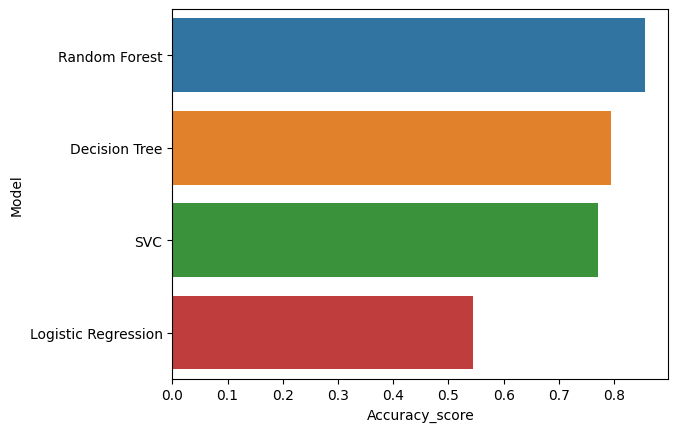

In [385]:
models = pd.DataFrame({
    'Model':['Logistic Regression', 'Decision Tree', 'Random Forest','SVC'],
    'Accuracy_score' :[test_accuracy_lg, test_accuracy_dtc, test_accuracy_rfc,test_accuracy_svc]
})
models
models = models.sort_values(by='Accuracy_score', ascending=False)
sns.barplot(x='Accuracy_score', y='Model', data=models)



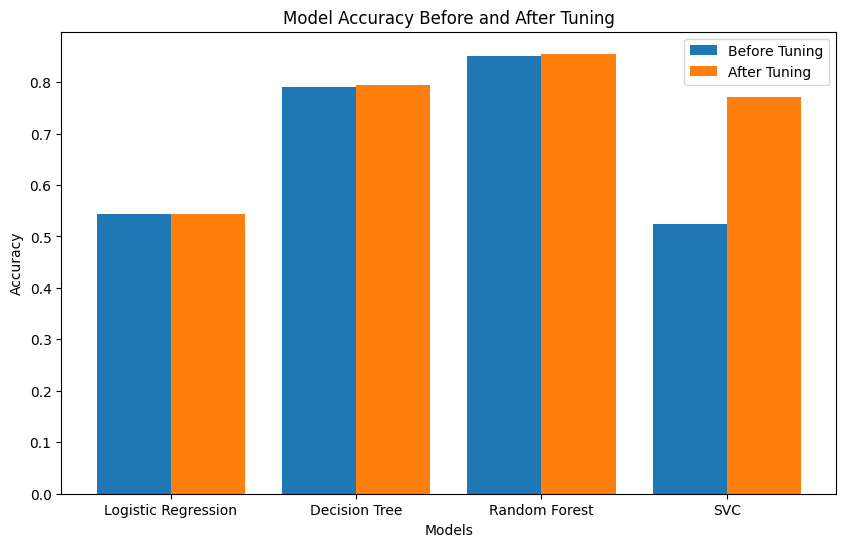

In [386]:
lg=LogisticRegression()
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
svc=SVC()
svc.fit(x_train, y_train)
y_pred_svc= svc.predict(x_test)
dtc.fit(x_train, y_train)
y_pred_dtc= dtc.predict(x_test)
rfc.fit(x_train, y_train)
y_pred_rfc= rfc.predict(x_test)
lg.fit(x_train, y_train)
y_pred_lg= lg.predict(x_test)
accuracy_lg=accuracy_score(y_pred_lg, y_test)
accuracy_rfc=accuracy_score(y_pred_rfc, y_test)
accuracy_dtc=accuracy_score(y_pred_dtc, y_test)
accuracy_svc=accuracy_score(y_pred_svc, y_test)


models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVC']
accuracies = [accuracy_lg, accuracy_dtc, accuracy_rfc, accuracy_svc]
tuned_accuracies =[test_accuracy_lg, test_accuracy_dtc, test_accuracy_rfc,test_accuracy_svc]
x = range(len(models))
width = 0.4
plt.figure(figsize=(10, 6))
plt.bar(x, accuracies, width, label='Before Tuning')
plt.bar([i + width for i in x], tuned_accuracies, width, label='After Tuning')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Before and After Tuning')
plt.xticks([i + width/2 for i in x], models)
plt.legend()
plt.show()

In [387]:
best_svc

{'C': 50, 'gamma': 0.1, 'kernel': 'rbf'}

In [388]:
best_dtc

{'criterion': 'gini', 'max_depth': 18}

In [389]:
best_rfc

{'max_depth': 43,
 'max_features': 'sqrt',
 'n_estimators': 100,
 'random_state': 41,
 'verbose': 0}